# Thruster

In [1]:
import os
from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider
from qiskit.visualization import plot_histogram
from custom_transpiler import IonQ_Transpiler

In [2]:
# Initialize the IonQ provider and backend
api_key = os.getenv("IONQ_API_KEY") or input("Enter your IonQ API key: ")
provider = IonQProvider(token=api_key)
backend = provider.get_backend("simulator", gateset="native")

## Simple example

In [17]:
custom_transpiler = IonQ_Transpiler(backend)

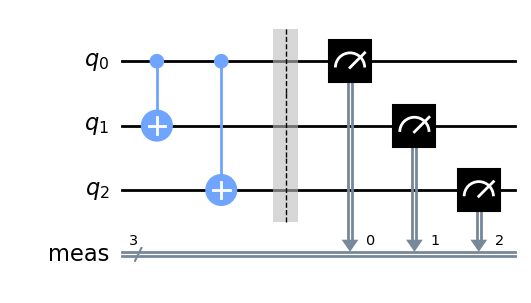

In [19]:
# Create a simple quantum circuit
qc = QuantumCircuit(3, name="cnots")
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

qc.draw("mpl")

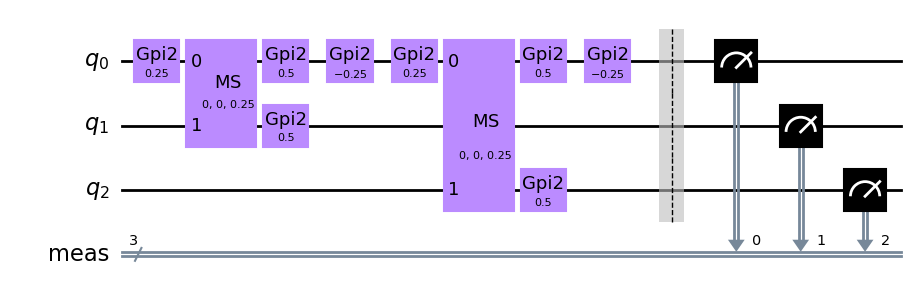

In [20]:
ibm_transpiled_circuit = transpile(qc, backend=backend, optimization_level=3)
ibm_transpiled_circuit.draw("mpl")

In [21]:
custom_transpiler = IonQ_Transpiler(backend)
transpiled = custom_transpiler.transpile(qc)
transpiled.draw("mpl")

Found gpi2 node: 5686247648, params: [0.25]
Found gpi2 node: 5693512720, params: [0.5]
Found gpi2 node: 5693516080, params: [-0.25]
Removing gpi2 nodes: 5693516080 and 5693953328
Found gpi2 node: 5693953328, params: [0.25]
Found gpi2 node: 5680481440, params: [0.5]
Found gpi2 node: 5680082320, params: [0.5]
Found gpi2 node: 5682044880, params: [-0.25]
Found gpi2 node: 5669237152, params: [0.5]


IndexError: list index out of range

In [ ]:
# Execute the circuit
job1 = backend.run(opt_circuit, noise_model="aria-1", shots=1000)
job2 = backend.run(transpiled_circuit, noise_model="aria-1", shots=1000)

In [ ]:
# Get the result
count1 = job1.get_counts()
print(f"IBM transpiler: ", count1)

count2 = job2.get_counts()
print(f"Custom transpiler: ", count2)